In [80]:
file_path = "matrix_c.txt"

coef_fourier = []

try:
    with open(file_path, 'r') as file:
        for line in file:
            # Разбиваем строку по пробелам (можно заменить на другой разделитель)
            parts = line.strip().split()
            # Преобразуем каждую часть в число и добавляем в список
            for part in parts:
                try:
                    coef = float(part)  # Используйте int(part), если числа целые
                    coef_fourier.append(coef)
                except ValueError:
                    print(f"Пропуск некорректного значения: '{part}'")
except FileNotFoundError:
    print(f"Ошибка: Файл {file_path} не найден!")
except Exception as e:
    print(f"Ошибка при чтении файла: {e}")

In [81]:
def print_coef_matrix(coef_fourier, Nx, Ny):
    """
    Печатает массив коэффициентов Фурье в виде матрицы Nx x Ny.
    
    Параметры:
    - coef_fourier: одномерный массив коэффициентов (длина Nx * Ny)
    - Nx: количество столбцов
    - Ny: количество строк
    """
    for j in range(Ny):
        for i in range(Nx):
            # Форматируем вывод: 6 знаков после запятой, фиксированная ширина
            print(f"{coef_fourier[j * Nx + i]:e}", end=" ")
        print()  # Переход на новую строку после Nx элементов

In [82]:
def print_coef_matrix_from_n(coef_fourier, Nx, Ny, start_index):
    """
    Печатает массив коэффициентов Фурье в виде матрицы Nx x Ny, начиная с элемента start_index.
    
    Параметры:
    - coef_fourier: одномерный массив коэффициентов
    - Nx: количество столбцов
    - Ny: количество строк
    - start_index: индекс элемента, с которого начинать печать (по умолчанию 0)
    """
    total_elements = Nx * Ny
    if start_index + total_elements > len(coef_fourier):
        print("Ошибка: Недостаточно элементов в массиве!")
        return

    for j in range(Ny):
        for i in range(Nx):
            index = start_index + j * Nx + i
            print(f"{coef_fourier[index]:e}", end=" ")
        print()  # Переход на новую строку после Nx элементов

In [83]:
print_coef_matrix_from_n(coef_fourier, Nx=5, Ny=5, start_index= 0)

0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 
0.000000e+00 1.000000e+00 9.796688e-17 -3.199535e-16 2.504248e-16 
0.000000e+00 1.665335e-16 6.162976e-33 -5.341563e-18 -2.136625e-17 
0.000000e+00 -3.885781e-16 9.842090e-18 3.591871e-17 1.167716e-17 
0.000000e+00 2.498002e-16 -2.402603e-17 -2.872031e-17 -1.440203e-17 


In [84]:
print_coef_matrix_from_n(coef_fourier, Nx=5, Ny=5, start_index = 25)

0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 
0.000000e+00 6.718219e-01 2.996621e-17 -5.334764e-17 2.982411e-17 
0.000000e+00 5.093942e-17 1.220391e-33 -6.867285e-19 -2.099366e-18 
0.000000e+00 -6.478979e-17 1.265331e-18 3.418697e-18 9.048028e-19 
0.000000e+00 2.974972e-17 -2.360706e-18 -2.225388e-18 -9.410038e-19 


In [1]:
import math

def lambda_m(m, N):
    """
    Вычисляет значение lambda_m для заданных m и N
    """
    tmp = math.sin((math.pi / 2.) * (2 * m - 1) / (2 * N - 1))
    lmbda = 4 * (N - 0.5)**2 * tmp**2
    return lmbda

def transform_coefficients(coef_fourier, Nx, Ny, tau, start_index):
    """
    Преобразует коэффициенты Фурье согласно заданной формуле
    
    Параметры:
    - coef_fourier: массив коэффициентов (будет изменен на месте)
    - Nx: количество точек по оси x
    - Ny: количество точек по оси y
    - tau: параметр tau из формулы
    """
    
    for n in range(1, Ny):
        for m in range(1, Nx):
            idx = start_index + n * Nx + m
            denominator = lambda_m(m, Nx) + lambda_m(n, Ny) + 1.0/tau
            coef_fourier[idx] = (coef_fourier[idx - start_index] / tau) / denominator

In [ ]:
min = 100
max = 0
for m in range(1, 10):
    for n in range(1, 10):
        tmp = (lambda_m(m, 10) + lambda_m(n, 10) + 2) / (lambda_m(m, 10) + lambda_m(n, 10) + 1)
        if(tmp > max): max = tmp
        if(tmp < min): min = tmp

In [ ]:
max = 0
for m in range(1, 10):
    for n in range(1, 10):
        tmp = (lambda_m(m, 10) + lambda_m(n, 10) + 2) / (lambda_m(m, 10) + lambda_m(n, 10) + 1)
        if(tmp > max): max = tmp
        if(tmp < min): min = tmp

In [3]:
min

1.0014215853029695

In [4]:
max

1.1688171304129207

In [8]:
2/(min + max)

0.9215576081639782

In [5]:
lambda_m(1, 5) + lambda_m(1, 5) + 1.0/0.1

14.88489771634142

In [6]:
(1/0.1) / 14.88489771634142

0.671821882190126

In [7]:
transform_coefficients(coef_fourier, 5, 5, 0.1, 25)
print_coef_matrix_from_n(coef_fourier, Nx=5, Ny=5, start_index = 25)

NameError: name 'coef_fourier' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, pi, exp
import seaborn as sns

sns.set(rc = {"figure.figsize":(16, 9)})

In [ ]:
coef_5_5    = np.loadtxt("inf/coef_5_5.txt")
coef_25_5   = np.loadtxt("inf/coef_25_5.txt")
coef_5_25   = np.loadtxt("inf/coef_5_25.txt")
coef_10_100 = np.loadtxt("inf/coef_10_100.txt")
coef_20_400 = np.loadtxt("inf/coef_20_400.txt")

In [ ]:
def fourier_coeff(t, n, m):
    return np.exp(- np.pi**2 *((2*m-1)**2 + (2*n-1)**2) * t /4)

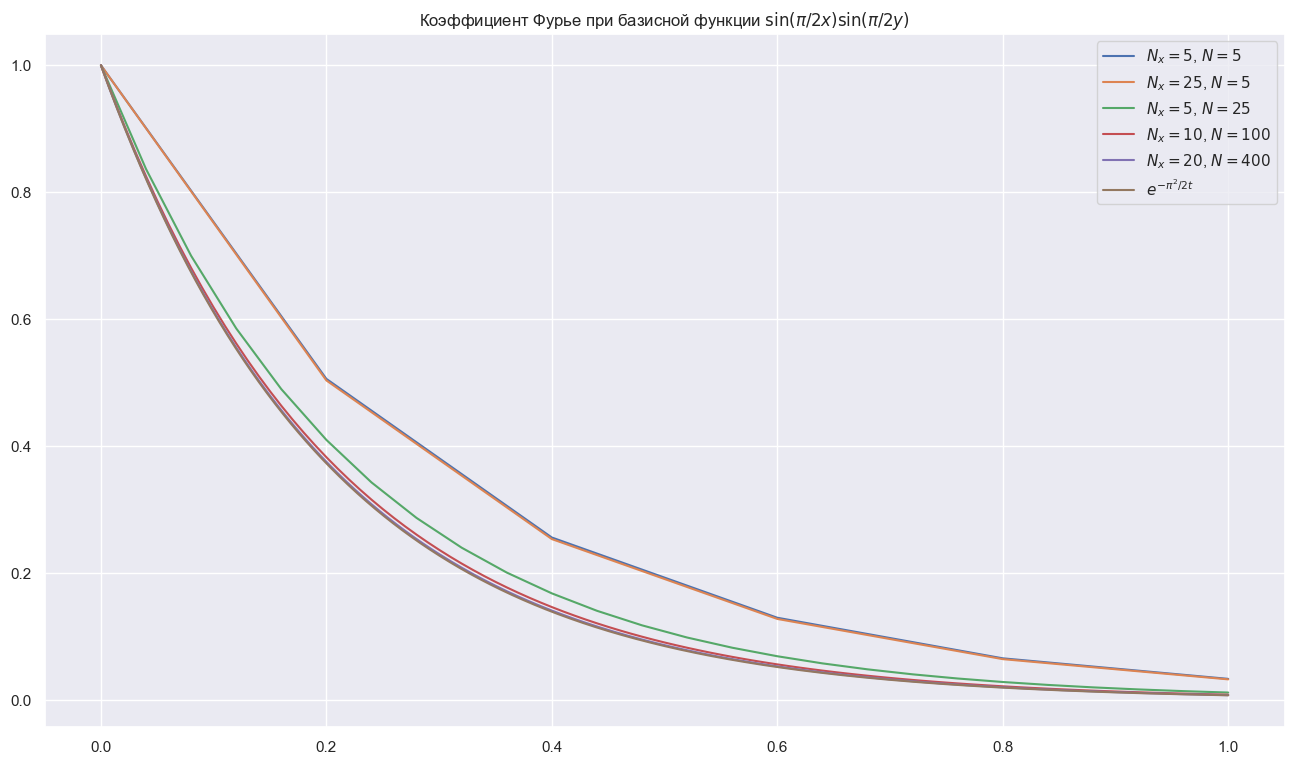

In [ ]:
net5    = np.linspace(0, 1, 6)
net25   = np.linspace(0, 1, 26)
net100   = np.linspace(0, 1, 101)
net400   = np.linspace(0, 1, 401)
net1000 = np.linspace(0, 1, 1000)

plt.plot(net5, coef_5_5[0],      label=r"$N_x = 5$, $N = 5$")
plt.plot(net5, coef_25_5[0],    label=r"$N_x = 25$, $N = 5$")
plt.plot(net25, coef_5_25[0],    label=r"$N_x = 5$, $N = 25$")
plt.plot(net100, coef_10_100[0], label=r"$N_x = 10$, $N = 100$")
plt.plot(net400, coef_20_400[0], label=r"$N_x = 20$, $N = 400$")
plt.plot(net1000, fourier_coeff(net1000, 1, 1), label=r"$e^{- \pi ^2 /2 t}$")
plt.title(r"Коэффициент Фурье при базисной функции $\sin(\pi/2 x) \sin(\pi/2 y)$")
plt.legend()
plt.savefig("test1_11.pdf")

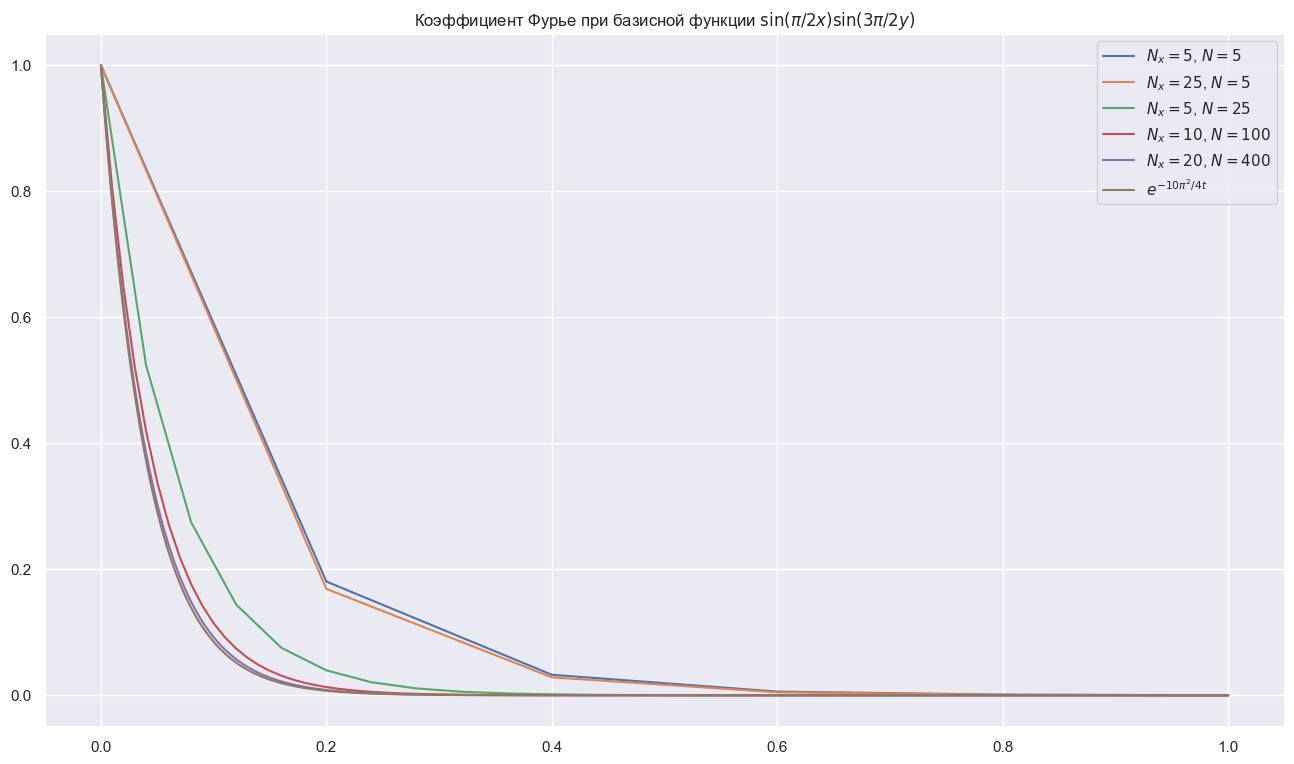

In [ ]:
plt.plot(net5, coef_5_5[1],      label=r"$N_x = 5$, $N = 5$")
plt.plot(net5, coef_25_5[1],    label=r"$N_x = 25$, $N = 5$")
plt.plot(net25, coef_5_25[1],    label=r"$N_x = 5$, $N = 25$")
plt.plot(net100, coef_10_100[1], label=r"$N_x = 10$, $N = 100$")
plt.plot(net400, coef_20_400[1], label=r"$N_x = 20$, $N = 400$")
plt.plot(net1000, fourier_coeff(net1000, 1, 2), label=r"$e^{- 10 \pi ^2 /4 t}$")
plt.title(r"Коэффициент Фурье при базисной функции $\sin(\pi/2 x) \sin(3\pi/2 y)$")
plt.legend()
plt.savefig("test1_12.pdf")

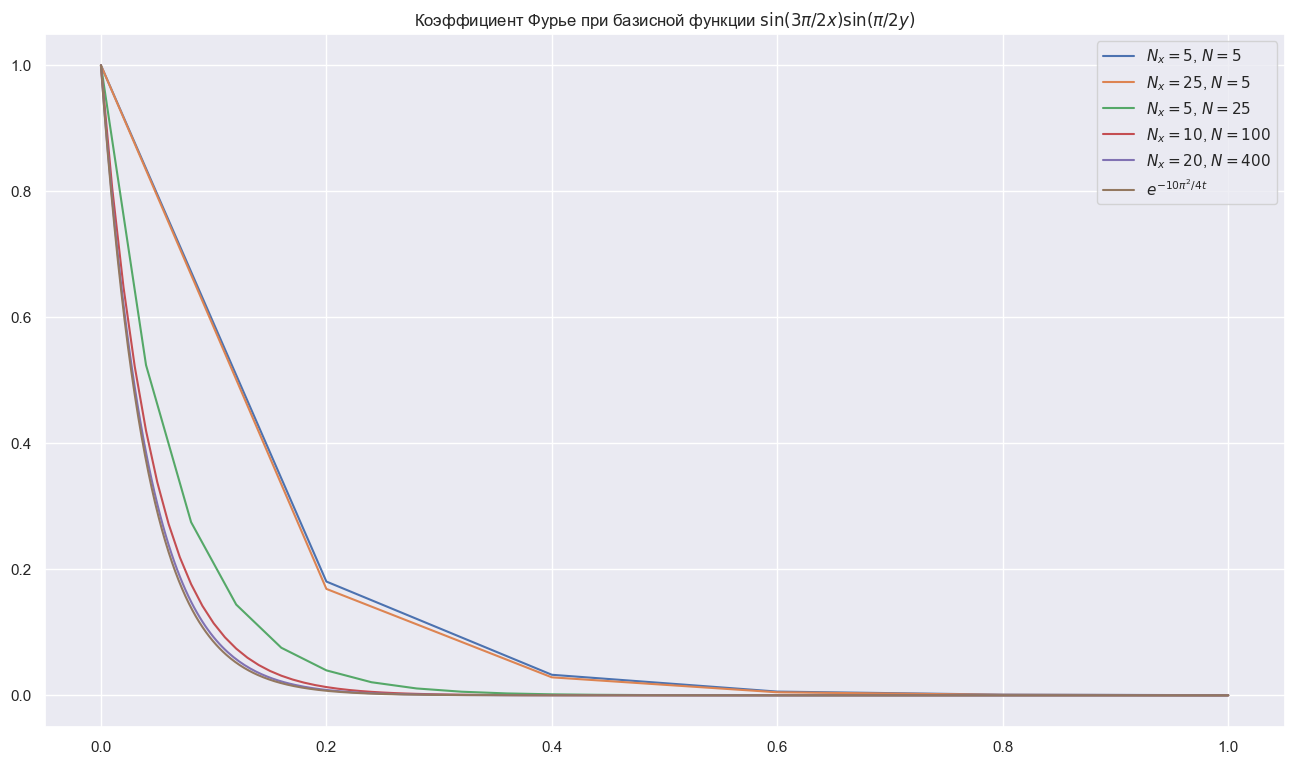

In [ ]:
plt.plot(net5, coef_5_5[2],      label=r"$N_x = 5$, $N = 5$")
plt.plot(net5, coef_25_5[2],    label=r"$N_x = 25$, $N = 5$")
plt.plot(net25, coef_5_25[2],    label=r"$N_x = 5$, $N = 25$")
plt.plot(net100, coef_10_100[2], label=r"$N_x = 10$, $N = 100$")
plt.plot(net400, coef_20_400[2], label=r"$N_x = 20$, $N = 400$")
plt.plot(net1000, fourier_coeff(net1000, 2, 1), label=r"$e^{- 10 \pi ^2 /4 t}$")
plt.title(r"Коэффициент Фурье при базисной функции $\sin(3\pi/2 x) \sin(\pi/2 y)$")
plt.legend()
plt.savefig("test1_21.pdf")

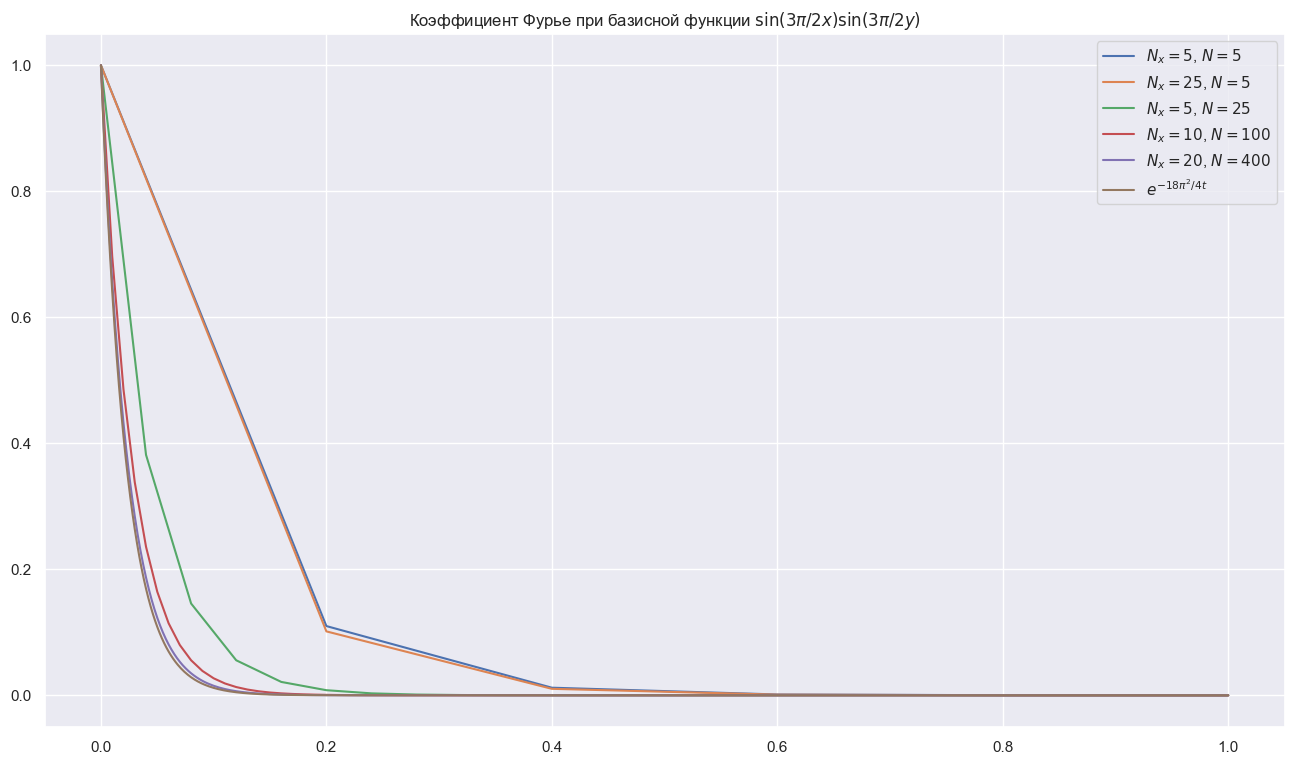

In [ ]:
plt.plot(net5, coef_5_5[3],      label=r"$N_x = 5$, $N = 5$")
plt.plot(net5, coef_25_5[3],    label=r"$N_x = 25$, $N = 5$")
plt.plot(net25, coef_5_25[3],    label=r"$N_x = 5$, $N = 25$")
plt.plot(net100, coef_10_100[3], label=r"$N_x = 10$, $N = 100$")
plt.plot(net400, coef_20_400[3], label=r"$N_x = 20$, $N = 400$")
plt.plot(net1000, fourier_coeff(net1000, 2, 2), label=r"$e^{- 18 \pi ^2 /4 t}$")
plt.title(r"Коэффициент Фурье при базисной функции $\sin(3\pi/2 x) \sin(3\pi/2 y)$")
plt.legend()
plt.savefig("test1_22.pdf")